In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random, ase, tqdm
import ase.visualize
import qml, glob

# Basic EDA

In [4]:
train, test = pd.read_csv('../data/train.csv'), pd.read_csv('../data/test.csv')
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [21]:
fdf, pdf = pd.read_hdf('../trash.h5'), pd.read_hdf('../trash_pred.h5')

In [23]:
import pickle
# bst = pickle.load(open('../models/cm_unsorted_maxterms_15_0.62_2019-06-23 19:26:51/bst_2_metric_0.6131.pkl', 'rb'))
bst = pickle.load(open('../down_fit_bst.pkl', 'rb'))
ypreds = bst.predict(pdf)
np.mean(ypreds)

15.463056492360458

In [24]:
a = np.array([1,2,3,4])
np.mean(a[[1,2]])

2.5

In [27]:
nc=list(train.columns)
train=train[nc[-2:]+nc[:-2]]
train.head()

,type,scalar_coupling_constant,id,molecule_name,atom_index_0,atom_index_1
0,1JHC,84.8076,0,dsgdb9nsd_000001,1,0
1,2JHH,-11.2570,1,dsgdb9nsd_000001,1,2
2,2JHH,-11.2548,2,dsgdb9nsd_000001,1,3
3,2JHH,-11.2543,3,dsgdb9nsd_000001,1,4
4,1JHC,84.8074,4,dsgdb9nsd_000001,2,0


uniques: 2505542 example: [4658147 4658148]
uniques: 45772 example: ['dsgdb9nsd_000004' 'dsgdb9nsd_000015']
uniques: 28 example: [2 3]
uniques: 29 example: [0 1]
uniques: 8 example: ['2JHC' '1JHC']


/home/lanfear/anaconda3/envs/tf_intro/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


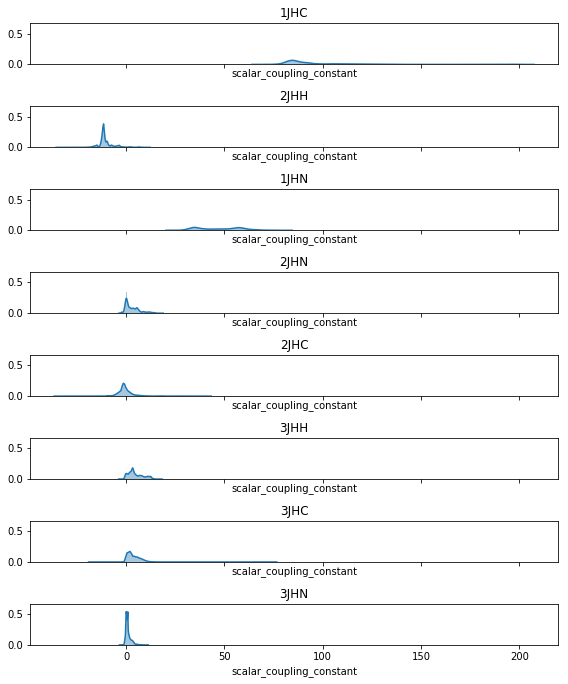

In [18]:
# Target distribution
f,a=plt.subplots(8,1,figsize=(8,1.2*8), sharex=True, sharey=True)
for i, sc_type in enumerate(train['type'].unique()):
    a[i].set_title(sc_type)
    sns.distplot(train[train['type'] == sc_type]['scalar_coupling_constant'], kde=True, bins=100 , ax=a[i])
plt.tight_layout()

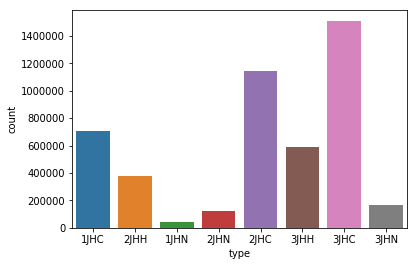

In [6]:
# Type histogram
sns.countplot(train['type'])

# Molecule visualization

In [5]:
struct = pd.read_csv('../data/structures.csv')
struct.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [2]:
xyz_files = glob.glob('../data/structures/*.xyz')
ase_cp = ase.io.read(xyz_files[0])

In [10]:
ase.visualize.view(ase_cp, viewer='x3d')

count    130775.000000
mean         18.035993
std           2.938363
min           3.000000
1%           11.000000
2%           12.000000
5%           13.000000
50%          18.000000
max          29.000000
Name: atom_index, dtype: float64


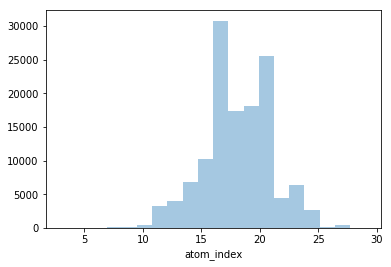

In [3]:
# Molecule size distribution

struct = pd.read_csv('../data/structures.csv')
num_atoms = struct.groupby('molecule_name').count()['atom_index']
print(num_atoms.describe(percentiles=[.01,.02,.05]))
sns.distplot(num_atoms, kde=False, bins=20)

# Coloumb matrix demo

In [78]:
compound = qml.Compound(xyz=xyz_files[0])
compound.generate_coulomb_matrix(size=29, sorting='unsorted')
cm_tri = compound.representation

In [79]:
size = 29
# cm_tri = cm_tri[::-1]
# cm = np.zeros((size, size))
# for i in range(size):
#     cm[i,i:] = cm_tri[-size+i:][::-1]
#     cm_tri = np.roll(cm_tri, size-i)
# cm += np.triu(cm, k=1).T
# cm
cm_tri = cm_tri[::-1]
cm = np.zeros((size, size))
for i in range(size):
    cm[:i+1,i] = cm_tri[-(i+1):][::-1]
    cm_tri = np.roll(cm_tri, i+1)
cm += np.triu(cm, k=1).T
cm

array([[36.8581052 , 22.86877504, 17.13453543, 10.70766726, 12.88688283,
         8.71126821, 11.6153868 , 13.39847809, 27.5713708 ,  5.48409337,
         5.49728009,  2.68882594,  2.61754782,  1.61250923,  1.40229111,
         1.3675792 ,  1.19031642,  2.34388038,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [22.86877504, 36.8581052 , 23.21316468, 11.9935453 , 11.38579162,
         7.94900002, 11.65935385, 13.2760464 , 19.49756675,  2.67563932,
         2.62181942,  5.49524306,  5.49844309,  1.75612919,  1.60854572,
         1.18415235,  1.12549285,  2.07846675,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [17.13453543, 23.21316468, 36.8581052 , 23.56038327, 19.68119663,
        11.38766129, 16.96059901, 22.27955387, 27.65397042,  2.24638035,
  

In [90]:
tfs = pd.read_hdf('../features/cm_unsorted_maxterms_5_train.h5')
tfs.head()

,sorted_CM_0_atom_0,sorted_CM_1_atom_0,sorted_CM_2_atom_0,sorted_CM_3_atom_0,sorted_CM_4_atom_0,sorted_CM_0_atom_1,sorted_CM_1_atom_1,sorted_CM_2_atom_1,sorted_CM_3_atom_1,sorted_CM_4_atom_1
0,5.494742,0.560815,0.560806,0.560803,0.5,36.858105,5.494775,5.494769,5.494749,5.494742
1,5.494742,0.560815,0.560806,0.560803,0.5,5.494749,0.560815,0.560806,0.560803,0.500000
2,5.494742,0.560815,0.560806,0.560803,0.5,5.494775,0.560806,0.560806,0.560803,0.500000
3,5.494742,0.560815,0.560806,0.560803,0.5,5.494769,0.560806,0.560806,0.560803,0.500000
4,5.494749,0.560815,0.560806,0.560803,0.5,36.858105,5.494775,5.494769,5.494749,5.494742


/home/lanfear/anaconda3/envs/tf_intro/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


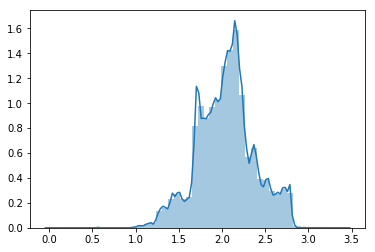

In [97]:
sns.distplot(tfs.values[:,4])

In [99]:
u, c = np.unique(['a', 'b', 'b', 'a', 'c'], return_counts=True)

In [100]:
u, c

(array(['a', 'b', 'c'], dtype='<U1'), array([2, 2, 1]))

In [101]:
u[2]

'c'

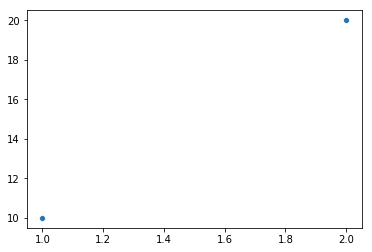

In [135]:
def ir_as_aulas_de_la_bunda(pessoa):
    return pessoa * 3

ines = 10
miguel = 20
ir_as_aulas_de_la_bunda(ines) + miguel
sns.scatterplot(x=[1,2], y=[ines, miguel])

0.0

NameError: name 'log_maes' is not defined